<a href="https://colab.research.google.com/github/ShreyasKadiri/Machine_Learning/blob/main/LSTM_RNN_Models_For_Univariate_Time_Series_Forecasting_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Develop LSTM Models For Univariate Time Series Forecasting

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# Extracting independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_index = i + n_features
		# check if we are beyond the sequence
		if end_index > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		sequence_x, sequence_y = timeseries_data[i:end_index], timeseries_data[end_index]
		X.append(sequence_x)
		y.append(sequence_y)
	return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries, n_steps)

In [6]:
#Independent Features
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [7]:
#Dependent Features
print(y)

[146 158 172 187 196 210]


In [8]:
X.shape

(6, 3)

In [9]:
# reshape from [samples, timesteps] into [samples, timesteps, features]. From (6, 3) we convert it into (6, 3, 1) i.2 3D as LSTM picks up
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
X.shape

(6, 3, 1)

In [11]:
#Building LSTM Model


In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33183.3242
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 32731.6797
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 32236.5996
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 31658.6094
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 30983.8516
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 30232.6660
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 29452.0469
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 28650.8438
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 27843.1035
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 27049.6875
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 26302.5781
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 25608.7285
Epoch

In [13]:
#Predicting For the next 10 data

In [16]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[216.63977]
1 day input [196.         210.         216.63977051]
1 day output [[227.65376]]
2 day input [210.         216.63977051 227.65376282]
2 day output [[233.36801]]
3 day input [216.63977 227.65376 233.36801]
3 day output [[241.70628]]
4 day input [227.65376 233.36801 241.70628]
4 day output [[247.92043]]
5 day input [233.36801 241.70628 247.92043]
5 day output [[254.39601]]
6 day input [241.70628 247.92043 254.39601]
6 day output [[260.7644]]
7 day input [247.92043 254.39601 260.7644 ]
7 day output [[266.60754]]
8 day input [254.39601 260.7644  266.60754]
8 day output [[272.57236]]
9 day input [260.7644  266.60754 272.57236]
9 day output [[278.34375]]
[216.63977, 227.65376, 233.36801, 241.70628, 247.92043, 254.39601, 260.7644, 266.60754, 272.57236, 278.34375]


In [18]:
timeseries

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [20]:
len(timeseries)


9

In [21]:
lst_output

[216.63977,
 227.65376,
 233.36801,
 241.70628,
 247.92043,
 254.39601,
 260.7644,
 266.60754,
 272.57236,
 278.34375]

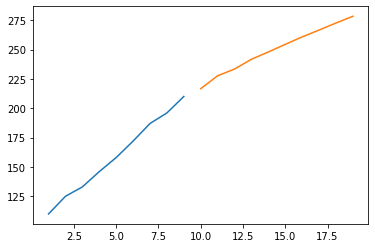

In [27]:
#Visualizing the output
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries)
plt.plot(day_pred,lst_output)